In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
train_dir = 'cifar10_alexnet_model/'

In [74]:
training_data = np.genfromtxt (train_dir+'training_data.csv', delimiter=",")
validation_data = np.genfromtxt (train_dir+'validation_data.csv', delimiter=",")

In [75]:
validation_data = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data))
training_data = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data))

In [76]:
training_df = pd.DataFrame(training_data, index=training_data.transpose()[0],columns=['step','error','accuracy'])
validation_df = pd.DataFrame(validation_data, index=validation_data.transpose()[0],columns=['step','error','accuracy'])

In [77]:
plot_df = pd.merge(training_df,validation_df,how='inner',on=['step','step'])

In [78]:
validation_data

array([[  0.        ,   6.37603718,   0.144375  ],
       [  0.3328    ,   5.2978416 ,   0.40515625],
       [  0.6912    ,   4.79654691,   0.44796875],
       [  1.024     ,   4.70023513,   0.41296875],
       [  1.3824    ,   3.96236387,   0.5328125 ],
       [  1.7408    ,   3.63878603,   0.56453125],
       [  2.0736    ,   3.26885549,   0.6103125 ],
       [  2.432     ,   3.21859873,   0.57109375],
       [  3.1232    ,   2.55872505,   0.66015625],
       [  3.4816    ,   2.44976999,   0.655625  ],
       [  3.8144    ,   2.22582645,   0.67921875],
       [  4.1728    ,   2.13042375,   0.67703125],
       [  4.5056    ,   2.0992623 ,   0.65234375],
       [  4.8384    ,   1.79969644,   0.7184375 ],
       [  5.1968    ,   1.90220691,   0.6621875 ],
       [  5.5552    ,   1.65010092,   0.70734375],
       [  6.2464    ,   1.52443507,   0.71078125],
       [  6.5792    ,   1.42195157,   0.73171875],
       [  6.9376    ,   1.42696244,   0.71609375],
       [  7.2704    ,   1.31402

In [79]:
plot_df

,step,error_x,accuracy_x,error_y,accuracy_y
0,0.0000,6.373750,0.140625,6.376037,0.144375
1,0.3328,5.459421,0.375000,5.297842,0.405156
2,0.6912,4.875565,0.406250,4.796547,0.447969
3,1.0240,4.340845,0.546875,4.700235,0.412969
4,1.3824,3.949933,0.554688,3.962364,0.532813
5,1.7408,3.646110,0.523438,3.638786,0.564531
6,2.0736,3.428468,0.570312,3.268855,0.610313
7,2.4320,3.111142,0.570312,3.218599,0.571094
8,3.1232,2.630909,0.617188,2.558725,0.660156
9,3.4816,2.315984,0.687500,2.449770,0.655625


In [80]:
plot_data = plot_df.as_matrix().transpose()

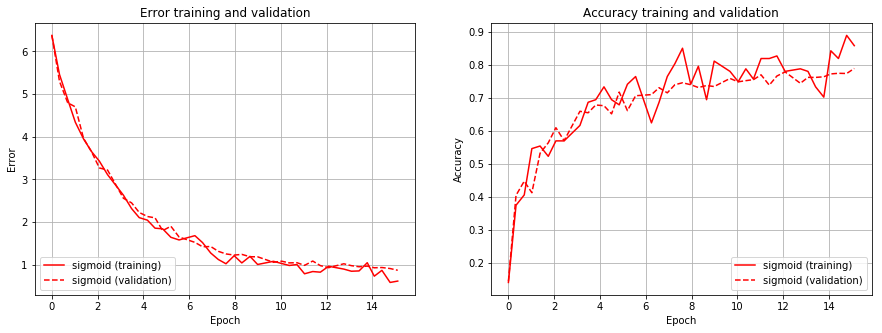

In [81]:
ax = plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(plot_data[0], plot_data[1], 'r-', label='sigmoid (training)')
plt.plot(plot_data[0], plot_data[3], 'r--', label='sigmoid (validation)')
'''plt.plot(err_train_tanh.keys(), err_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(err_valid_tanh.keys(), err_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(err_train_relu.keys(), err_train_relu.values(), 'g-', label='relu (training)')
plt.plot(err_valid_relu.keys(), err_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Error training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='lower left', fontsize='medium')

plt.subplot(122)
plt.plot(plot_data[0], plot_data[2], 'r-', label='sigmoid (training)')
plt.plot(plot_data[0], plot_data[4], 'r--', label='sigmoid (validation)')
'''plt.plot(acc_train_tanh.keys(), acc_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(acc_valid_tanh.keys(), acc_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(acc_train_relu.keys(), acc_train_relu.values(), 'g-', label='relu (training)')
plt.plot(acc_valid_relu.keys(), acc_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Accuracy training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize='medium')

#plt.savefig('activation_functions.pdf', bbox_inches='tight')
plt.show()